**Why Data pre processing ??**
**Why I found is hard to have complete set workflow of Feature Data Engineering ??**

Data preprocessing is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values (e.g., Income: −100), impossible data combinations (e.g., Sex: Male, Pregnant: Yes), missing values, etc. Analyzing data that has not been carefully screened for such problems can produce misleading results. Thus, the representation and quality of data is first and foremost before running an analysis.[1] Often, data preprocessing is the most important phase of a machine learning project, especially in computational biology.[2]

If there is much irrelevant and redundant information present or noisy and unreliable data, then knowledge discovery during the training phase is more difficult. Data preparation and filtering steps can take considerable amount of processing time. Data preprocessing includes cleaning, Instance selection, normalization, transformation, feature extraction and selection, etc. The product of data preprocessing is the final training set. 

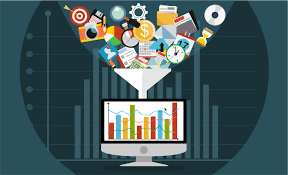]


**What is Feature Engineering ?**

Applying your knowledge of the data and the model you are using, to create better feature to train your model with.

-Which features should I use?

-Do I need to transform these features in some way?

-How do I handle missing data?

-Should I create new features from the existing ones?

**You can't just throw in raw data and expect good result.**

"This is the art of Machine Learning ; where expertise is applied ; Applied Machine Learning is basically Feature Engineering " - Andrew Ng


**The Curse of Dimensionality**

Too many features can be a problem that will lead to sparse data. And have to be remember that every feature is a new dimension -equal- more compute resources. 

Much of feature engineering is selecting the features most relevant to the problem at hand, this is often where domain knowledge comes into play.

Unsupervised dimensionality reduction techniques can also be employed to distill many features into fewer features :
Using Principal Component Analysis (PCA) AND/OR K-Means.

**Special Thanks** to Kaggle Team, Github Team, Wikipedia, and StackOverflow Team  for abundant source data that make this important notebook happen.

-Comprehensive Data Exploration with Python by Pedro Marcelino

-Stacked Regressions to predict House Prices by Serigne

This notebook is Data preprosesing unit for Supervised learning, csv file, multiple colum/multivaried column.

By using this overflow of Data Engineering notebook, it will make it simpler for the Machine Learning Professional to have a good source of Data. By following this notebook's overflow you can analysize any data source easily.

Using data from House Prices: Advanced Regression Techniques, Kaggle competition.



Important step as Data Scientist is to work with Data.
Below is the step by step to work with CSV data:

1.  Understand the problem. 
     We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
     
2. Univariable study. 
    We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
    
3. Multivariate study. 
    We'll try to understand how the dependent variable and independent variables relate.
    
4. Feature Engineering 
    We'll clean the dataset and handle the missing data, outliers and categorical variables.
   
5. Test assumptions. 
    We'll check if our data meets the assumptions required by most multivariate techniques.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
print(os.listdir('../input'))

In [ ]:
df_train = pd.read_csv('../input/train.csv')

In [ ]:
df_train.info()

In [ ]:
df_train.head(20)

In [ ]:
df_train.columns


In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:

**Variable** - Variable name.

**Type** - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

**Segment** - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').

**Expectation **- Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
Conclusion - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.

**Comments** - Any general comments that occured to us.
While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:


In [ ]:
#check if there any zero in minimal of the price
df_train['SalePrice'].describe()

**Handling Unbalanced data**

Large discrepancy between 'positive' and 'negative' caces. Example Fraud Detection. Fraud is rare and most rows will be not fraud. Don't let the terminology confuse you, "positive" doesn't mean good, it means the thin you are testing for is what happened, if your machine learning is made to detect fraud, the fraud is the positive case. Mainly a problem with Neural Network.

1.Oversampling : duplicate samples from the minority class, can be done at random.

2.Undersampling : instead of creating more positive samples, remove negative ones but throwing away data is usually not the right answer, unless you are specifically trying to avoid big data scalling issues.

3.SMOTE (Synthetic Minority Over-Sampling Techniqe) : Run K-nearest neighbors of each sample minority class, and create new sample for the KNN result(mean of the neighbors). Both generates new samples and undersamples majority class. Generally better than just oversampling

4.Adjusting Thresholds : When making predictions about a classification (fraud/not fraud), you have some sort of threshold of probability at which point you'll flag something as the positive case(fraud). If you have too many false positive, one way to fix that is to simply increase that threshold, guaranteed to reduce false positives but could result in more false negative.

**Simple Tutorial for Seaborn : 
Data Visualization**

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. 


In [ ]:
#https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions
sns.distplot(df_train['SalePrice'], bins=20, rug=True);

In [ ]:
#Skew = ambience distributions data (0=evenly distributed)
#Kurt = to check the outlier data (3=standart value)
print("Skewness: %f" %df_train['SalePrice'].skew())
print("Kurtosis: %f" %df_train['SalePrice'].kurt())

**Feature Selection with Correlation**


**Correlation** quantifies the degree to which two variables are related. Correlation does not fit a line through the data points. You simply are computing a correlation coefficient (r) that tells you how much one variable tends to change when the other one does. When r is 0.0, there is no relationship. When r is positive, there is a trend that one variable goes up as the other one goes up. When r is negative, there is a trend that one variable goes up as the other one goes down.
**Linear regression** finds the best line that predicts Y from X.  Correlation does not fit a line
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient


1. Correlation matrix (heatmap style).
2. 'SalePrice' correlation matrix (zoomed heatmap style).
3. Scatter plots between the most correlated variables 

In [ ]:
#Annotation Heatmap https://seaborn.pydata.org/examples/heatmap_annotation.html

Heatmap_Annotation = df_train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(Heatmap_Annotation, 
            vmax=.8, square=True)

In [ ]:
#Diagonal Correlation https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style='white')
Diagonal_Corr = df_train.corr()
mask = np.zeros_like(Diagonal_Corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Diagonal_Corr, mask=mask, cmap=cmap,
           vmax=.8, center=0,square=True,
           linewidths=5, cbar_kws={"shrink":.5})

**SalePrice Correlations**

OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea. These are our first six highest corr from the Heatmap that satisfied saleprice correlations

In [ ]:
#SalePrice Correlation Matrix
k=10
sns.set(font_scale=1.25)
corrmat=df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, annot=True, square=True,
           fmt='.2f', annot_kws={'size':10},
           yticklabels=cols.values,
           xticklabels=cols.values)


In [ ]:
#Scatterplot https://seaborn.pydata.org/tutorial/regression.html
cols = ['SalePrice', 'OverallQual','GrLivArea',
       'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt']
sns.pairplot(df_train[cols], size =5)

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.


One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).


The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).


**Missing data**

Important questions when thinking about missing data:

How prevalent is the missing data?
Is missing data random or does it have a pattern?
The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

**How to solve imputing Missing Data**

1.Mean Replacement : replace missing values with the mean value from the rest of the column(not rows, a column represents a single feature, it only make sense to take the mean from other samples of the same feature). Median are better choice than Mean when outliers are present.

2.Dropping : best approach if not many rows contain missing data.

3.Inputing Missing Data with Machine Learning model

-KNN : Find K nearest rows and average their values. Assumes numerical data, not categorical. There are ways to handle categorical data (Hamming distance), but categorical data is probably better served by Deep Learning and MICE Regression

-Deep Learning : Build a machine learning model to impute data for your machine learning model, works well for categorical data, but its need more compute resources.

-MICE Regression : Find linear or non-linear relationship between missing feature and other features, it's the most advanced technique MICE (Multiple Imputation by Chained Equation)

4. Just Get More data 

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=total.index, y=total)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values',fontsize=15)
plt.title('Percent missing data by feature',fontsize=15)

**Feature Enginering**

Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 50% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' , 'FireplaceQu' and 'Fence are strong candidates for outliers and bias so we'll be happy to delete them.

The features engeneering is rather parsimonious (at least compared to some others great scripts) . 

**Imputing missing values** by proceeding sequentially through the data

**Transforming **some numerical variables that seem really categorical

**Label Encoding** some categorical variables that may contain information in their ordering set

**Box Cox Transformation** of skewed features (instead of log-transformation) : This gave me a slightly better result both on leaderboard and cross-validation.

**Getting dummy variables** for categorical features.

In [ ]:
#drop columns/keys that have more than 50% of null values
df_train = df_train.drop((missing_data[missing_data['Percent'] > 50 ]).index,1)
df_train.isnull().sum().sort_values(ascending=False) #check

In [ ]:
#FireplaceQu : data description says Null means "no fireplace"
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('None')

In [ ]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None



In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2',
            'GarageType', 'GarageFinish', 'GarageQual', 
            'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

In [ ]:
#GarageYrBlt replacing missing data with 0
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [ ]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

In [ ]:
#Electrical : It has one NA value. 
#Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [ ]:
df_train.isnull().sum().sort_values(ascending=False) #check

**More Feature Engineering ** 

Reduce size of the matrix to save cost of computation by deleting features/colomns that less than 1 % have correlation with SalePrice

In [ ]:
#SalePrice Correlation Matrix
k=10
sns.set(font_scale=1.5)
corrmat=df_train.corr()
cols = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, annot=True, square=True,
           fmt='.2f', annot_kws={'size':10},
           yticklabels=cols.values,
           xticklabels=cols.values)




In [ ]:
#deleting uncorrelate colomns
Uncor = ['EnclosedPorch', 'OverallCond', 
        'YrSold', 'LowQualFinSF', 'Id', 
         'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2']
df_train.drop(Uncor, axis=1, inplace=True)
df_train.info()

In [ ]:
#More features engineering
#Transforming some numerical variables that are really
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

**More Features Engineering**

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [ ]:
# Adding total sqfootage feature 
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

**Meet the Outlier**

In statistics, an outlier is an observation point that is distant from other observations.
The above definition suggests that outlier is something which is separate/different from the crowd.

There are two types of analysis we will follow to find the outliers- Uni-variate(one variable outlier analysis) and Multi-variate(two or more variable outlier analysis).

In [ ]:
#Univariate analysis
#Detect and exclude outlier in numeric dtype
#low 0.05 and high 0.90 quantile
from pandas.api.types import is_numeric_dtype
def remove_outlier(df_train):
    low = .05
    high = .90
    quant_df = df_train.quantile([low, high])
    for name in list(df_train.columns):
        if is_numeric_dtype(df_train[name]):
            df_train = df_train[(df_train[name] > quant_df.loc[low, name]) & (df_train[name] < quant_df.loc[high, name])]
    return df_train

remove_outlier(df_train).head()

In [ ]:
#check the standardizing data
for name in list(df_train.columns):
    if is_numeric_dtype(df_train[name]):
        saleprice_scaled = StandardScaler().fit_transform(df_train[name][:,np.newaxis]);
        low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:5]
        high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-5:]
        print('outer range (low) of the distribution:',name)
        print(low_range)
        print('\nouter range (high) of the distribution:',name)
        print(high_range)

The primary concern here is to establish a threshold that defines an observation as an outlier.

How 'df_train'  looks with her new clothes:
primary concern of possible outlier : Total1SF and BsmtFinSF1 ,we should be careful with those 11 something values.

**Most common causes of outliers on a data set:**
- Data entry errors (human errors)
- Measurement errors (instrument errors)
- Experimental errors (data extraction or experiment planning/executing errors)
- Intentional (dummy outliers made to test detection methods)
- Data processing errors (data manipulation or data set unintended mutations)
- Sampling errors (extracting or mixing data from wrong or various sources)
- Natural (not an error, novelties in data)

Also, when starting an outlier detection quest you have to answer two important questions about your dataset:

- Which and how many features am I taking into account to detect outliers ? (univariate / multivariate)
- Can I assume a distribution(s) of values for my selected features? (parametric / non-parametric)


Some of the most popular methods for outlier detection are:

* Z-Score or Extreme Value Analysis (parametric)
* Probabilistic and Statistical Modeling (parametric)
* Linear Regression Models (PCA, LMS)
* Proximity Based Models (non-parametric)
* Information Theory Models
* High Dimensional Outlier Detection Methods (high dimensional sparse data)
* Best Fit for most cases are using Random Cut Forest

In [ ]:
#Bivariate/Multivariate outlier checking with scatter plot
for name in list(df_train.columns):
    if is_numeric_dtype(df_train[name]):
        data = pd.concat([df_train['SalePrice'], df_train[name]], axis=1)
        data.plot.scatter(x=name, y='SalePrice', ylim=(0,800000))

In [ ]:
#Dropping the outlier
#Only on the Feature that perform linear regression dot in the scatter plot
df_train = df_train.drop(df_train[df_train['LotFrontage'] > 300].index)
df_train = df_train.drop(df_train[df_train['LotArea'] > 60000].index)
df_train = df_train.drop(df_train[(df_train['OverallQual'] > 9) & (df_train['SalePrice'] < 200000)].index)
df_train = df_train.drop(df_train[df_train['MasVnrArea'] > 1500].index)
df_train = df_train.drop(df_train[df_train['TotalBsmtSF'] > 3000].index)
df_train = df_train.drop(df_train[df_train['1stFlrSF'] > 2500].index)
df_train = df_train.drop(df_train[df_train['BsmtFullBath'] > 2.5].index)
df_train = df_train.drop(df_train[df_train['HalfBath'] > 1.5].index)
df_train = df_train.drop(df_train[df_train['BedroomAbvGr'] > 4].index)
df_train = df_train.drop(df_train[df_train['TotRmsAbvGrd'] > 13].index)
df_train = df_train.drop(df_train[df_train['Fireplaces'] > 2.5].index)
df_train = df_train.drop(df_train[df_train['GarageCars'] > 3].index)
df_train = df_train.drop(df_train[df_train['GarageArea'] >= 1250].index)


We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

**Normality** 

When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.


Normalization technique : 
1. Log Transformation
2. Sqrt Transformation
3. Box-Cox Transformation
What is a Box Cox Transformation?
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

The Box Cox transformation is named after statisticians George Box and Sir David Roxbee Cox who collaborated on a 1964 paper and developed the technique.

**Homoscedasticity** 

I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

**Linearity**

The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

**Absence of correlated errors**

Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.



In [ ]:
#skewed features
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)

In [ ]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #df_train[feat] += 1
    df_train [feat] = boxcox1p(df_train[feat], lam)
    
#df_train[skewed_features] = np.log1p(df_train[skewed_features])

In [ ]:
#check
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

**Label Encoding**


In many practical Data Science activities, the data set will contain categorical variables. These variables are typically stored as text values which represent various traits. Some examples include color (“Red”, “Yellow”, “Blue”), size (“Small”, “Medium”, “Large”) or geographic designations (State or Country). Regardless of what the value is used for, the challenge is determining how to use this data in the analysis. Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. Therefore, the analyst is faced with the challenge of figuring out how to turn these text attributes into numerical values for further processing.

As with many other aspects of the Data Science world, there is no single answer on how to approach this problem. Each approach has trade-offs and has potential impact on the outcome of the analysis. Fortunately, the python tools of pandas and scikit-learn provide several approaches that can be applied to transform the categorical data into suitable numeric values.  http://pbpython.com/categorical-encoding.html

In [ ]:
from sklearn.preprocessing import LabelEncoder
colomns = df_train.dtypes[df_train.dtypes == "object"].index
# process columns, apply LabelEncoder to categorical features
for name in colomns:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[name].values)) 
    df_train[name] = lbl.transform(list(df_train[name].values))

# shape        
print('Shape of df_train: {}'.format(df_train.shape))

In [ ]:
#Dummy categorical features
df_train = pd.get_dummies(df_train)
print(df_train.shape)
df_train.head(20) #please compare the data after engineering and before engineering

**Motivation**

Feature engineering is an essential part of building any intelligent system. Even though you have a lot of newer methodologies coming in like deep learning and meta-heuristics which aid in automated machine learning, each problem is domain specific and better features (suited to the problem) is often the deciding factor of the performance of your system. Feature Engineering is an art as well as a science and this is the reason Data Scientists often spend 70% of their time in the data preparation phase before modeling. Let’s look at a few quotes relevant to feature engineering from several renowned people in the world of Data Science.

> “Coming up with features is difficult, time-consuming, requires expert knowledge. ‘Applied machine learning’ is basically feature engineering.”*
— Prof. Andrew Ng.

This basically reinforces what we mentioned earlier about data scientists spending close to 80% of their time in engineering features which is a difficult and time-consuming process, requiring both domain knowledge and mathematical computations.

>“Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.”
>— Dr. Jason Brownlee

This gives us an idea about feature engineering being the process of transforming data into features to act as inputs for machine learning models such that good quality features help in improving the overall model performance. Features are also very much dependent on the underlying problem. Thus, even though the machine learning task might be same in different scenarios, like classification of emails into spam and non-spam or classifying handwritten digits, the features extracted in each scenario will be very different from the other.


Prof. Pedro Domingos from the University of Washington, in his paper titled, “A Few Useful Things to Know about Machine Learning” tells us the following.

> “At the end of the day, some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used.”
> — Prof. Pedro Domingos


The final quote which should motivate you about feature engineering is from renowned Kaggler, Xavier Conort. Most of you already know that tough real-world machine learning problems are often posted on Kaggle regularly which is usually open to everyone.

> “The algorithms we used are very standard for Kagglers. …We spent most of our efforts in feature engineering. … We were also very careful to discard features likely to expose us to the risk of over-fitting our model.”
> — Xavier Conort

**Steps that're not Feature Engineering**

-Initial data collection

-Creating the target variable

-Removing duplicates, handling missing values, fixing mislabeled classes -it's data cleaning

-Scaling or normalization

-Feature Selection

**Feature Engineering**

-Extract more new gold features, remove irrelevant or noisy features
  Simpler models with better results

-Key Elements
  
  1.Target Transformation

2.Feature Encoding
 
 3.Feature Extraction
  
**TARGET TRANSFORMATION**
Predictor/Response Variable Transformation

-Use it when variable showed a skewed distribution make the residuals more close to 'normal distribution(bell curve)

**FEATURE ENCODING**
Turn categorical features into numeric features to provide more fine-grained information

-Help explicity capture non-linear relationships and interactions between the values of features

-Most ML tools only accept numbers as their input: xgboost, gbm, gimnet, libsvm, liblinear,etc.

*1.Label Encoding*
Interpret the categories as ordered integers(mostly wrong)

Python scikit-learn:LabelEncoder

OK for tree-based methods

*2.One Hot Encoding*
Transform categories into individual binary (0 or 1)

Python scikit-learn: DictVectorizer, OneHotEncoder

OK for K-means, Linear, NNs, etc

*3.Frequency Encoding*
Encoding of categorical levels of features to values between 0 and 1 based on their relative frequency

*4.Target Mean Encoding*
Instead of dummy encoding of categorical variables and increasing the number of features we can encodee each level as the mean of the response.
Also instead of just by mean, it is better to calculate weighted average of the overall mean of the training set and the mean of the level.
The weight are based on the frequency of the levels i.e. if a category only appears a few times in the dataset then its encoded value will be close to the overall mean instead of the mean of that level.

To avoid overfitting in Target Mean Encoding we could use leave-one-out schema

*5.Weight of Evidence*

*6.Weight of Evidence and Information Value*


**Feature Encoding-for Numerical Value**

-Binning using quantiles(population of the same size in each bin) or histograms(bins of same size).
  Replace with bin's mean or median
  -Treat bin id as a category level and use any categorical encoding schema
  
 -Dimensionality reduction techniques-SVD and PCA
 
 -Clustering and using cluster IDs or/and distances to cluster centers as new features